In [1]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [2]:
from varcode.effects import Substitution

In [3]:
from utils import data

In [4]:
impact_gene_names = pd.read_csv(path.join(data.REPO_DATA_DIR, "impact_gene_list.csv")).Hugo_symbol.tolist()

In [5]:
from pyensembl import EnsemblRelease
ensembl = EnsemblRelease(75)

In [6]:
impact_gene_ids = []
for impact_gene_name in impact_gene_names:
    try:
        ids = ensembl.gene_ids_of_gene_name(impact_gene_name)
    except:
        ids = []
    if len(ids) == 0:
        print("No ID for gene %s" % impact_gene_name)
    elif len(ids) > 1:
        print("Multiple IDs for gene %s (%s)" % (impact_gene_name, ids))
    else:
        impact_gene_ids.extend(ids)

Multiple IDs for gene BTK (['ENSG00000010671', 'ENSG00000268897'])
Multiple IDs for gene DAXX (['ENSG00000204209', 'ENSG00000229396', 'ENSG00000231617', 'ENSG00000227046', 'ENSG00000206279', 'ENSG00000206206'])
Multiple IDs for gene FGF3 (['ENSG00000186895', 'ENSG00000261155'])
Multiple IDs for gene ATRX (['ENSG00000085224', 'ENSG00000268946'])
Multiple IDs for gene SDHD (['ENSG00000204370', 'ENSG00000255292'])
Multiple IDs for gene HLA-A (['ENSG00000206503', 'ENSG00000223980', 'ENSG00000227715', 'ENSG00000224320', 'ENSG00000231834', 'ENSG00000229215', 'ENSG00000206505', 'ENSG00000235657'])
Multiple IDs for gene IKBKE (['ENSG00000143466', 'ENSG00000263528'])
No ID for gene CDKN2Ap14ARF
Multiple IDs for gene KDM5C (['ENSG00000126012', 'ENSG00000269816'])
No ID for gene FAM123B
Multiple IDs for gene KMT2A (['ENSG00000118058', 'ENSG00000267910'])
Multiple IDs for gene NOTCH4 (['ENSG00000204301', 'ENSG00000234876', 'ENSG00000223355', 'ENSG00000235396', 'ENSG00000232339', 'ENSG00000238196',

In [7]:
from cohorts.functions import *

In [8]:
def missense_impact_snv_count(row, cohort, filter_fn=None, normalized_per_mb=None, **kwargs):
    from cohorts.variant_filters import no_filter
    filter_fn = first_not_none_param([filter_fn, cohort.filter_fn], no_filter)
    normalized_per_mb = first_not_none_param([normalized_per_mb, cohort.normalized_per_mb], False)
    
    patient_id = row["patient_id"]
    def impact_filter_fn(filterable_effect):
        if filter_fn is not None:
            return (filter_fn(filterable_effect) and 
                    filterable_effect.effect.gene.id in impact_gene_ids)
        return filterable_effect.effect.gene.id in impact_gene_ids
    return missense_snv_count(row, cohort, filter_fn=impact_filter_fn)

In [9]:
cohort = data.init_cohort()

{'dataframe_hash': -2899676230513618006,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [10]:
from utils.paper import *

inner join with ensembl_coverage: 25 to 25 rows
Mann-Whitney test: U=86.5, p-value=0.420406508069 (two-sided)
{{{pfs_impact_missense_snv_count_plot}}}
{{{pfs_impact_missense_snv_count_benefit:0.13 (range 0.00-0.31)}}}
{{{pfs_impact_missense_snv_count_no_benefit:0.046 (range 0.00-0.37)}}}
{{{pfs_impact_missense_snv_count_mw:n=25, Mann-Whitney p=0.42}}}


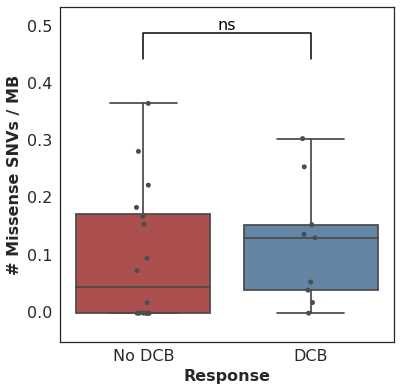

In [11]:
mann_whitney_hyper_label_printer(cohort.plot_benefit(on={"# Missense SNVs / MB":
                                                         missense_impact_snv_count}),
                                     label="pfs_impact_missense_snv_count")

Mann-Whitney test: U=83.5, p-value=0.782189544288 (two-sided)
{{{os_impact_missense_snv_count_plot}}}
{{{os_impact_missense_snv_count_benefit:0.093 (range 0.00-0.31)}}}
{{{os_impact_missense_snv_count_no_benefit:0.074 (range 0.00-0.37)}}}
{{{os_impact_missense_snv_count_mw:n=25, Mann-Whitney p=0.78}}}


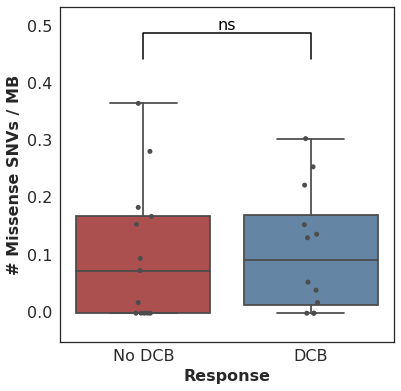

In [12]:
mann_whitney_hyper_label_printer(cohort.plot_benefit(on={"# Missense SNVs / MB": 
                                                         missense_impact_snv_count},
                                                     benefit_col="is_benefit_os"),
                                     label="os_impact_missense_snv_count")